In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Recall,Precision
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import f1_score
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # tensorflow학습시 warning 숨김
import warnings
warnings.filterwarnings(action='ignore') # 그래프 그릴때 경고 메세지 안 보이게
plt.rc('font', family = 'AppleGothic')

In [2]:
asos_df = pd.read_csv('/Volumes/ESD-ISO/project_preson/shared_data_preparation/ASOS_data_preprocessed_V4.csv')

In [3]:
label_encoding_dict = {
    "no_clouds": 0,
    "Sc": 1,
    "Ci": 2,
    "ScAs": 3,
    "StNs": 4,
    "Ac": 5,
    "As": 6,
    "ScAc": 7,
    "ScCi": 8,
    "CuSc": 9,
    "AcCi": 10,
    "StAs": 11,
    "StSc": 12,
    "St": 13,
    "Cu": 14,
    "Cs": 15,
    "CuCi": 16,
    "ScNs": 17,
    "AsCi": 18,
    "CuAc": 19,
    "StCi": 20,
    "AcCs": 21,
    "ScCs": 22,
    "Cc": 23,
    "ScAcCi": 24,
    "CuAs": 25,
    "CsCi": 26,
    "AsAc": 27,
    "CbSt": 28,
    "CuSt": 29,
    "CbStNs": 30,
    "AcCc": 31,
    "AsCs": 32,
    "CbSc": 33,
    "CbCu": 34,
    "CbNs": 35,
    "Ns": 36,
    "ScCc": 37,
    "CuScCi": 38,
    "StAc": 39,
    "CcCi": 40,
    "CuScAs": 41,
    "CbAs": 42,
    "CuScAc": 43,
    "ScAcCs": 44,
    "Cb": 45,
    "CuScAcCi": 46,
    "CuScCc": 47,
    "CuCs": 48,
    "CbCi": 49,
    "CuAcCi": 50,
    "CuCc": 51,
    "ScAcCc": 52,
    "CuScCs": 53,
    "AsCc": 54,
    "ScCcCi": 55,
    "CbAc": 56,
    "CbCuNs": 57,
    "CuNs": 58,
    "CuScAsCi": 59,
    "ScAsCi": 60,
    "AcCcCi": 61,
    "CuScNs": 62,
    "AsSc": 63,
    "ScCu": 64,
    "CuScAcCc": 65,
    "CbScNs": 66,
    "CuScCcCi": 67,
    "CbScCs": 68,
    "CuCcCi": 69,
    "CuAcCc": 70,
    "StAsCi": 71,
    "CbScAs": 72,
    "ScAsCs": 73
}

In [4]:
asos_df['clfmAbbrCd'] = asos_df['clfmAbbrCd'].map(lambda x : label_encoding_dict[x])

In [5]:
def time_rain_whether(time):
    return asos_df['rainy_day'].shift(-time)

In [6]:
df_3h = asos_df.copy()
df_6h = asos_df.copy()
df_12h = asos_df.copy()
df_24h = asos_df.copy()

In [7]:
df_3h['rain_whether'] = time_rain_whether(3)
df_6h['rain_whether'] = time_rain_whether(6)
df_12h['rain_whether'] = time_rain_whether(12)
df_24h['rain_whether'] = time_rain_whether(24)

In [8]:
df_6h

,tm,hm,pv,ps,td,pa,dc10Tca,clfmAbbrCd,lcsCh,m005Te,m01Te,m02Te,m03Te,vs,ws,wd,rn,rainy_day,rain_whether
0,1980-01-01 03:00,56.0,3.9,1027.0,-6.0,1015.9,2.0,2,0.0,-1.2,0.3,0.5,0.6,2000.0,2.5,50.0,0.0,0,0.0
1,1980-01-01 09:00,65.0,4.7,1027.0,-3.6,1016.0,10.0,5,0.0,-0.5,0.4,0.4,0.6,2500.0,2.5,50.0,0.0,0,0.0
2,1980-01-01 15:00,58.0,5.5,1025.0,-1.4,1014.2,10.0,7,0.0,0.0,0.5,0.6,0.7,2500.0,3.3,20.0,0.0,0,0.0
3,1980-01-01 21:00,60.0,5.4,1023.9,-1.7,1013.0,10.0,3,0.0,0.2,0.6,0.7,0.7,2000.0,2.7,20.0,0.0,0,0.0
4,1980-01-02 03:00,86.0,7.0,1021.1,1.9,1010.2,10.0,17,0.0,0.5,0.4,0.7,0.6,1500.0,3.7,20.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146999,2024-12-30 21:00:00,67.0,6.1,1016.0,0.0,1005.4,6.0,2,2.0,-0.1,-0.3,0.8,1.7,1053.0,2.7,270.0,0.0,0,NaN
147000,2024-12-30 22:00:00,71.0,6.1,1016.2,0.0,1005.6,0.0,0,0.0,-0.1,-0.3,0.8,1.7,906.0,2.4,270.0,0.0,0,NaN
147001,2024-12-30 23:00:00,75.0,6.1,1016.0,0.0,1005.4,0.0,0,0.0,-0.1,-0.3,0.8,1.7,754.0,0.7,250.0,0.0,0,NaN
147002,2024-12-31 00:00:00,81.0,7.0,1015.8,1.8,1005.2,9.0,0,0.0,-0.1,-0.3,0.8,1.7,563.0,2.3,250.0,0.0,0,NaN


In [9]:
def resampling_data(data):
    scaler = MinMaxScaler()
    rain_data = data[data['rain_whether']==1].loc[:, ['hm','pv','td','pa','m005Te','m01Te','m02Te','m03Te','clfmAbbrCd','lcsCh','rain_whether']] # 비가 온 시간만 선택
    no_rain_data = data[data['rain_whether']==0].sample(n=len(rain_data)).loc[:,['hm','pv','td','pa','m005Te','m01Te','m02Te','m03Te','clfmAbbrCd','lcsCh','rain_whether']] # 비가 안온 시간중 렌덤으로 rain_data갯수만큼 선택
    data = pd.concat([rain_data, no_rain_data])
    data = data.sample(frac=1).reset_index(drop=True) # 데이터 셔플
    split_index = round((len(data)/10)*7) # 학습데이터와 테스트데이터를 7:3으로 나누기위해
    train_X = data.iloc[:split_index,:-1]
    train_y = data.iloc[:split_index,-1]
    test_X = data.iloc[split_index:,:-1]
    test_y = data.iloc[split_index:,-1]
    train_X = scaler.fit_transform(train_X) # 스케일 조정
    test_X = scaler.transform(test_X) # 스케일 조정
    return train_X, train_y, test_X, test_y

In [10]:
train_3h_X,train_3h_y,test_3h_X,test_3h_y = resampling_data(df_3h)
train_6h_X,train_6h_y,test_6h_X,test_6h_y = resampling_data(df_6h)
train_12h_X,train_12h_y,test_12h_X,test_12h_y = resampling_data(df_12h)
train_24h_X,train_24h_y,test_24h_X,test_24h_y = resampling_data(df_24h)

In [11]:
print('3시간 데이터',train_3h_X.shape,train_3h_y.shape,test_3h_X.shape,test_3h_y.shape)
print('6시간 데이터',train_6h_X.shape,train_6h_y.shape,test_6h_X.shape,test_6h_y.shape)
print('12시간 데이터',train_12h_X.shape,train_12h_y.shape,test_12h_X.shape,test_12h_y.shape)
print('24시간 데이터',train_24h_X.shape,train_24h_y.shape,test_24h_X.shape,test_24h_y.shape)

3시간 데이터 (12407, 10) (12407,) (5317, 10) (5317,)
6시간 데이터 (12407, 10) (12407,) (5317, 10) (5317,)
12시간 데이터 (12407, 10) (12407,) (5317, 10) (5317,)
24시간 데이터 (12407, 10) (12407,) (5317, 10) (5317,)


In [12]:
def build_model(input_shape, layer_units=[64, 128, 256, 64, 32], dropouts=[0.3, 0.4, 0.4, 0.3, 0.2], output_activation='sigmoid'):    
    model = Sequential()
    
    model.add(Dense(layer_units[0], activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(dropouts[0]))

    for units, dropout_rate in zip(layer_units[1:], dropouts[1:]):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1, activation=output_activation))

    # Compile model
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy', Recall(), Precision()]
    )

    return model

In [13]:
model_3h = build_model(train_3h_X.shape[1])
model_6h = build_model(train_6h_X.shape[1])
model_12h = build_model(train_12h_X.shape[1])
model_24h = build_model(train_24h_X.shape[1])

Metal device set to: Apple M2 Pro


In [14]:
model_3h.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                1

In [15]:
model_6h.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [16]:
model_12h.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 64)               

In [17]:
model_24h.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                704       
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 64)               

In [18]:
def get_checkpoint(hours_ahead, save_dir=os.getcwd()):
    file_name = hours_ahead + '_epoch-{epoch:02d}-acc-{accuracy:.4f}-val_acc-{val_accuracy:.4f}.h5'
    checkpoint = ModelCheckpoint(
        filepath=os.path.join(save_dir,file_name), # 저장 경로
        monitor='val_accuracy',     # val_accuracy 기준으로 성능 평가
        save_best_only=True,        # 성능이 개선된 경우에만 저장
        mode='max',                 # val_accuracy가 최대일 때를 기준
        verbose=1                   # 저장될 때 로그 출력
    )
    return checkpoint

In [19]:
callbacks_3h = get_checkpoint(hours_ahead = '3h', save_dir='/Volumes/ESD-ISO/project_preson/DNN/DNN_models/3h_models')
callbacks_6h = get_checkpoint(hours_ahead = '6h', save_dir='/Volumes/ESD-ISO/project_preson/DNN/DNN_models/6h_models')
callbacks_12h = get_checkpoint(hours_ahead = '12h', save_dir='/Volumes/ESD-ISO/project_preson/DNN/DNN_models/12h_models')
callbacks_24h = get_checkpoint(hours_ahead = '24h', save_dir='/Volumes/ESD-ISO/project_preson/DNN/DNN_models/24h_models')

In [20]:
history_3h = model_3h.fit(train_3h_X,train_3h_y, 
                          validation_split=0.2,
                          epochs=100,
                          callbacks=callbacks_3h
                         )

Epoch 1/100
311/311 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.5956 - recall: 0.6472 - precision: 0.5855
Epoch 1: val_accuracy improved from -inf to 0.67244, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/3h_models/3h_epoch-01-acc-0.5956-val_acc-0.6724.h5
311/311 [==============================] - 3s 9ms/step - loss: 0.6651 - accuracy: 0.5956 - recall: 0.6472 - precision: 0.5855 - val_loss: 0.6303 - val_accuracy: 0.6724 - val_recall: 0.5977 - val_precision: 0.6949
Epoch 2/100
309/311 [============================>.] - ETA: 0s - loss: 0.6228 - accuracy: 0.6577 - recall: 0.6237 - precision: 0.6678
Epoch 2: val_accuracy improved from 0.67244 to 0.67889, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/3h_models/3h_epoch-02-acc-0.6572-val_acc-0.6789.h5
311/311 [==============================] - 3s 8ms/step - loss: 0.6228 - accuracy: 0.6572 - recall: 0.6232 - precision: 0.6674 - val_loss: 0.6169 - val_accuracy: 0.6789 - val_recall: 

Epoch 19/100
310/311 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7172 - recall: 0.7192 - precision: 0.7153
Epoch 19: val_accuracy did not improve from 0.73328
311/311 [==============================] - 2s 7ms/step - loss: 0.5625 - accuracy: 0.7172 - recall: 0.7191 - precision: 0.7152 - val_loss: 0.5502 - val_accuracy: 0.7288 - val_recall: 0.7702 - val_precision: 0.7061
Epoch 20/100
303/311 [============================>.] - ETA: 0s - loss: 0.5589 - accuracy: 0.7210 - recall: 0.7228 - precision: 0.7188
Epoch 20: val_accuracy improved from 0.73328 to 0.73610, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/3h_models/3h_epoch-20-acc-0.7206-val_acc-0.7361.h5
311/311 [==============================] - 2s 7ms/step - loss: 0.5595 - accuracy: 0.7206 - recall: 0.7205 - precision: 0.7195 - val_loss: 0.5529 - val_accuracy: 0.7361 - val_recall: 0.7155 - val_precision: 0.7403
Epoch 21/100
307/311 [============================>.] - ETA: 0s - loss: 0.5606 - 

Epoch 39/100
310/311 [============================>.] - ETA: 0s - loss: 0.5516 - accuracy: 0.7265 - recall: 0.7256 - precision: 0.7258
Epoch 39: val_accuracy did not improve from 0.73852
311/311 [==============================] - 2s 7ms/step - loss: 0.5515 - accuracy: 0.7265 - recall: 0.7256 - precision: 0.7259 - val_loss: 0.5531 - val_accuracy: 0.7301 - val_recall: 0.7711 - val_precision: 0.7074
Epoch 40/100
308/311 [============================>.] - ETA: 0s - loss: 0.5514 - accuracy: 0.7251 - recall: 0.7286 - precision: 0.7220
Epoch 40: val_accuracy did not improve from 0.73852
311/311 [==============================] - 2s 7ms/step - loss: 0.5511 - accuracy: 0.7255 - recall: 0.7292 - precision: 0.7228 - val_loss: 0.5577 - val_accuracy: 0.7232 - val_recall: 0.7547 - val_precision: 0.7046
Epoch 41/100
304/311 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.7243 - recall: 0.7267 - precision: 0.7225
Epoch 41: val_accuracy did not improve from 0.73852
311/311 [====

303/311 [============================>.] - ETA: 0s - loss: 0.5455 - accuracy: 0.7321 - recall: 0.7353 - precision: 0.7292
Epoch 59: val_accuracy did not improve from 0.74053
311/311 [==============================] - 2s 7ms/step - loss: 0.5466 - accuracy: 0.7314 - recall: 0.7357 - precision: 0.7283 - val_loss: 0.5471 - val_accuracy: 0.7313 - val_recall: 0.8038 - val_precision: 0.6972
Epoch 60/100
305/311 [============================>.] - ETA: 0s - loss: 0.5470 - accuracy: 0.7360 - recall: 0.7332 - precision: 0.7361
Epoch 60: val_accuracy did not improve from 0.74053
311/311 [==============================] - 2s 7ms/step - loss: 0.5463 - accuracy: 0.7364 - recall: 0.7347 - precision: 0.7362 - val_loss: 0.5407 - val_accuracy: 0.7373 - val_recall: 0.7694 - val_precision: 0.7178
Epoch 61/100
311/311 [==============================] - ETA: 0s - loss: 0.5459 - accuracy: 0.7329 - recall: 0.7363 - precision: 0.7303
Epoch 61: val_accuracy did not improve from 0.74053
311/311 [=================

Epoch 79/100
304/311 [============================>.] - ETA: 0s - loss: 0.5445 - accuracy: 0.7352 - recall: 0.7372 - precision: 0.7330
Epoch 79: val_accuracy did not improve from 0.74617
311/311 [==============================] - 2s 7ms/step - loss: 0.5444 - accuracy: 0.7352 - recall: 0.7371 - precision: 0.7333 - val_loss: 0.5414 - val_accuracy: 0.7377 - val_recall: 0.7596 - val_precision: 0.7224
Epoch 80/100
304/311 [============================>.] - ETA: 0s - loss: 0.5421 - accuracy: 0.7362 - recall: 0.7536 - precision: 0.7278
Epoch 80: val_accuracy did not improve from 0.74617
311/311 [==============================] - 2s 7ms/step - loss: 0.5425 - accuracy: 0.7356 - recall: 0.7527 - precision: 0.7268 - val_loss: 0.5392 - val_accuracy: 0.7405 - val_recall: 0.7400 - val_precision: 0.7352
Epoch 81/100
310/311 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7345 - recall: 0.7395 - precision: 0.7312
Epoch 81: val_accuracy did not improve from 0.74617
311/311 [====

Epoch 100/100
305/311 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7376 - recall: 0.7452 - precision: 0.7333
Epoch 100: val_accuracy did not improve from 0.74617
311/311 [==============================] - 2s 7ms/step - loss: 0.5384 - accuracy: 0.7374 - recall: 0.7454 - precision: 0.7327 - val_loss: 0.5381 - val_accuracy: 0.7397 - val_recall: 0.7514 - val_precision: 0.7288


In [21]:
history_6h = model_6h.fit(train_6h_X,train_6h_y, 
                          validation_split=0.2,
                          epochs=100,
                          batch_size=32,
                          callbacks=callbacks_6h
                         )

Epoch 1/100
311/311 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.5878 - recall_1: 0.5799 - precision_1: 0.5884
Epoch 1: val_accuracy improved from -inf to 0.60999, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/6h_models/6h_epoch-01-acc-0.5878-val_acc-0.6100.h5
311/311 [==============================] - 3s 9ms/step - loss: 0.6727 - accuracy: 0.5878 - recall_1: 0.5799 - precision_1: 0.5884 - val_loss: 0.6581 - val_accuracy: 0.6100 - val_recall_1: 0.5852 - val_precision_1: 0.6051
Epoch 2/100
311/311 [==============================] - ETA: 0s - loss: 0.6552 - accuracy: 0.6207 - recall_1: 0.5674 - precision_1: 0.6341
Epoch 2: val_accuracy improved from 0.60999 to 0.61483, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/6h_models/6h_epoch-02-acc-0.6207-val_acc-0.6148.h5
311/311 [==============================] - 2s 7ms/step - loss: 0.6552 - accuracy: 0.6207 - recall_1: 0.5674 - precision_1: 0.6341 - val_loss: 0.6538 - val_accuracy: 0

Epoch 19/100
303/311 [============================>.] - ETA: 0s - loss: 0.6259 - accuracy: 0.6503 - recall_1: 0.6950 - precision_1: 0.6372
Epoch 19: val_accuracy did not improve from 0.64343
311/311 [==============================] - 2s 7ms/step - loss: 0.6267 - accuracy: 0.6494 - recall_1: 0.6950 - precision_1: 0.6362 - val_loss: 0.6290 - val_accuracy: 0.6422 - val_recall_1: 0.7144 - val_precision_1: 0.6160
Epoch 20/100
304/311 [============================>.] - ETA: 0s - loss: 0.6252 - accuracy: 0.6499 - recall_1: 0.7012 - precision_1: 0.6358
Epoch 20: val_accuracy did not improve from 0.64343
311/311 [==============================] - 2s 7ms/step - loss: 0.6265 - accuracy: 0.6484 - recall_1: 0.6998 - precision_1: 0.6338 - val_loss: 0.6316 - val_accuracy: 0.6410 - val_recall_1: 0.7383 - val_precision_1: 0.6102
Epoch 21/100
311/311 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.6498 - recall_1: 0.6889 - precision_1: 0.6382
Epoch 21: val_accuracy did not improv

306/311 [============================>.] - ETA: 0s - loss: 0.6210 - accuracy: 0.6562 - recall_1: 0.6800 - precision_1: 0.6481
Epoch 38: val_accuracy did not improve from 0.65391
311/311 [==============================] - 2s 7ms/step - loss: 0.6212 - accuracy: 0.6563 - recall_1: 0.6807 - precision_1: 0.6483 - val_loss: 0.6248 - val_accuracy: 0.6507 - val_recall_1: 0.7103 - val_precision_1: 0.6263
Epoch 39/100
304/311 [============================>.] - ETA: 0s - loss: 0.6197 - accuracy: 0.6550 - recall_1: 0.6738 - precision_1: 0.6490
Epoch 39: val_accuracy did not improve from 0.65391
311/311 [==============================] - 2s 7ms/step - loss: 0.6197 - accuracy: 0.6551 - recall_1: 0.6726 - precision_1: 0.6491 - val_loss: 0.6270 - val_accuracy: 0.6487 - val_recall_1: 0.5975 - val_precision_1: 0.6546
Epoch 40/100
307/311 [============================>.] - ETA: 0s - loss: 0.6197 - accuracy: 0.6586 - recall_1: 0.6760 - precision_1: 0.6532
Epoch 40: val_accuracy did not improve from 0.6539

305/311 [============================>.] - ETA: 0s - loss: 0.6168 - accuracy: 0.6621 - recall_1: 0.6783 - precision_1: 0.6571
Epoch 57: val_accuracy improved from 0.65955 to 0.66035, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/6h_models/6h_epoch-57-acc-0.6626-val_acc-0.6604.h5
311/311 [==============================] - 2s 7ms/step - loss: 0.6163 - accuracy: 0.6626 - recall_1: 0.6790 - precision_1: 0.6566 - val_loss: 0.6251 - val_accuracy: 0.6604 - val_recall_1: 0.6708 - val_precision_1: 0.6479
Epoch 58/100
310/311 [============================>.] - ETA: 0s - loss: 0.6152 - accuracy: 0.6639 - recall_1: 0.6809 - precision_1: 0.6578
Epoch 58: val_accuracy did not improve from 0.66035
311/311 [==============================] - 2s 7ms/step - loss: 0.6153 - accuracy: 0.6639 - recall_1: 0.6809 - precision_1: 0.6578 - val_loss: 0.6239 - val_accuracy: 0.6559 - val_recall_1: 0.6848 - val_precision_1: 0.6385
Epoch 59/100
309/311 [============================>.] - ETA: 0s - loss

Epoch 77/100
311/311 [==============================] - ETA: 0s - loss: 0.6142 - accuracy: 0.6568 - recall_1: 0.6677 - precision_1: 0.6527
Epoch 77: val_accuracy did not improve from 0.66035
311/311 [==============================] - 2s 7ms/step - loss: 0.6142 - accuracy: 0.6568 - recall_1: 0.6677 - precision_1: 0.6527 - val_loss: 0.6213 - val_accuracy: 0.6539 - val_recall_1: 0.6379 - val_precision_1: 0.6491
Epoch 78/100
309/311 [============================>.] - ETA: 0s - loss: 0.6142 - accuracy: 0.6623 - recall_1: 0.6578 - precision_1: 0.6633
Epoch 78: val_accuracy did not improve from 0.66035
311/311 [==============================] - 2s 7ms/step - loss: 0.6144 - accuracy: 0.6620 - recall_1: 0.6570 - precision_1: 0.6628 - val_loss: 0.6233 - val_accuracy: 0.6543 - val_recall_1: 0.6510 - val_precision_1: 0.6457
Epoch 79/100
309/311 [============================>.] - ETA: 0s - loss: 0.6151 - accuracy: 0.6627 - recall_1: 0.6506 - precision_1: 0.6664
Epoch 79: val_accuracy did not improv

Epoch 97/100
311/311 [==============================] - ETA: 0s - loss: 0.6117 - accuracy: 0.6620 - recall_1: 0.6528 - precision_1: 0.6642
Epoch 97: val_accuracy did not improve from 0.66197
311/311 [==============================] - 2s 7ms/step - loss: 0.6117 - accuracy: 0.6620 - recall_1: 0.6528 - precision_1: 0.6642 - val_loss: 0.6209 - val_accuracy: 0.6612 - val_recall_1: 0.6823 - val_precision_1: 0.6456
Epoch 98/100
307/311 [============================>.] - ETA: 0s - loss: 0.6124 - accuracy: 0.6665 - recall_1: 0.6620 - precision_1: 0.6674
Epoch 98: val_accuracy improved from 0.66197 to 0.66438, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/6h_models/6h_epoch-98-acc-0.6667-val_acc-0.6644.h5
311/311 [==============================] - 2s 7ms/step - loss: 0.6123 - accuracy: 0.6667 - recall_1: 0.6619 - precision_1: 0.6675 - val_loss: 0.6201 - val_accuracy: 0.6644 - val_recall_1: 0.6757 - val_precision_1: 0.6516
Epoch 99/100
306/311 [============================>.] - E

In [22]:
history_12h = model_12h.fit(train_12h_X,train_12h_y, 
                          validation_split=0.2,
                          epochs=100,
                          batch_size=32,
                          callbacks=callbacks_12h
                         )

Epoch 1/100
311/311 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5554 - recall_2: 0.5555 - precision_2: 0.5576
Epoch 1: val_accuracy improved from -inf to 0.59146, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/12h_models/12h_epoch-01-acc-0.5554-val_acc-0.5915.h5
311/311 [==============================] - 3s 9ms/step - loss: 0.6858 - accuracy: 0.5554 - recall_2: 0.5555 - precision_2: 0.5576 - val_loss: 0.6698 - val_accuracy: 0.5915 - val_recall_2: 0.5420 - val_precision_2: 0.6155
Epoch 2/100
308/311 [============================>.] - ETA: 0s - loss: 0.6772 - accuracy: 0.5865 - recall_2: 0.5094 - precision_2: 0.6044
Epoch 2: val_accuracy improved from 0.59146 to 0.59508, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/12h_models/12h_epoch-02-acc-0.5862-val_acc-0.5951.h5
311/311 [==============================] - 2s 7ms/step - loss: 0.6773 - accuracy: 0.5862 - recall_2: 0.5087 - precision_2: 0.6047 - val_loss: 0.6755 - val_accurac

310/311 [============================>.] - ETA: 0s - loss: 0.6650 - accuracy: 0.5941 - recall_2: 0.5407 - precision_2: 0.6079
Epoch 18: val_accuracy did not improve from 0.61160
311/311 [==============================] - 2s 7ms/step - loss: 0.6651 - accuracy: 0.5939 - recall_2: 0.5406 - precision_2: 0.6075 - val_loss: 0.6640 - val_accuracy: 0.6035 - val_recall_2: 0.5365 - val_precision_2: 0.6342
Epoch 19/100
307/311 [============================>.] - ETA: 0s - loss: 0.6652 - accuracy: 0.5943 - recall_2: 0.5437 - precision_2: 0.6082
Epoch 19: val_accuracy did not improve from 0.61160
311/311 [==============================] - 2s 7ms/step - loss: 0.6650 - accuracy: 0.5947 - recall_2: 0.5438 - precision_2: 0.6078 - val_loss: 0.6726 - val_accuracy: 0.5894 - val_recall_2: 0.3998 - val_precision_2: 0.6662
Epoch 20/100
311/311 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.5973 - recall_2: 0.5172 - precision_2: 0.6185
Epoch 20: val_accuracy did not improve from 0.6116

Epoch 38/100
305/311 [============================>.] - ETA: 0s - loss: 0.6591 - accuracy: 0.6042 - recall_2: 0.5687 - precision_2: 0.6129
Epoch 38: val_accuracy did not improve from 0.61442
311/311 [==============================] - 2s 7ms/step - loss: 0.6589 - accuracy: 0.6045 - recall_2: 0.5721 - precision_2: 0.6141 - val_loss: 0.6643 - val_accuracy: 0.5923 - val_recall_2: 0.7211 - val_precision_2: 0.5829
Epoch 39/100
311/311 [==============================] - ETA: 0s - loss: 0.6601 - accuracy: 0.6017 - recall_2: 0.5878 - precision_2: 0.6069
Epoch 39: val_accuracy did not improve from 0.61442
311/311 [==============================] - 2s 7ms/step - loss: 0.6601 - accuracy: 0.6017 - recall_2: 0.5878 - precision_2: 0.6069 - val_loss: 0.6647 - val_accuracy: 0.5955 - val_recall_2: 0.4517 - val_precision_2: 0.6527
Epoch 40/100
305/311 [============================>.] - ETA: 0s - loss: 0.6621 - accuracy: 0.6006 - recall_2: 0.5599 - precision_2: 0.6120
Epoch 40: val_accuracy did not improv

308/311 [============================>.] - ETA: 0s - loss: 0.6579 - accuracy: 0.6058 - recall_2: 0.5622 - precision_2: 0.6188
Epoch 57: val_accuracy improved from 0.61724 to 0.61805, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/12h_models/12h_epoch-57-acc-0.6065-val_acc-0.6180.h5
311/311 [==============================] - 2s 7ms/step - loss: 0.6577 - accuracy: 0.6065 - recall_2: 0.5631 - precision_2: 0.6191 - val_loss: 0.6609 - val_accuracy: 0.6180 - val_recall_2: 0.5868 - val_precision_2: 0.6390
Epoch 58/100
310/311 [============================>.] - ETA: 0s - loss: 0.6568 - accuracy: 0.6099 - recall_2: 0.5854 - precision_2: 0.6179
Epoch 58: val_accuracy did not improve from 0.61805
311/311 [==============================] - 2s 7ms/step - loss: 0.6568 - accuracy: 0.6100 - recall_2: 0.5856 - precision_2: 0.6179 - val_loss: 0.6661 - val_accuracy: 0.6112 - val_recall_2: 0.5114 - val_precision_2: 0.6549
Epoch 59/100
306/311 [============================>.] - ETA: 0s - lo

306/311 [============================>.] - ETA: 0s - loss: 0.6542 - accuracy: 0.6116 - recall_2: 0.5654 - precision_2: 0.6247
Epoch 76: val_accuracy did not improve from 0.61886
311/311 [==============================] - 2s 7ms/step - loss: 0.6537 - accuracy: 0.6125 - recall_2: 0.5667 - precision_2: 0.6262 - val_loss: 0.6639 - val_accuracy: 0.6060 - val_recall_2: 0.5507 - val_precision_2: 0.6332
Epoch 77/100
310/311 [============================>.] - ETA: 0s - loss: 0.6541 - accuracy: 0.6084 - recall_2: 0.5545 - precision_2: 0.6240
Epoch 77: val_accuracy did not improve from 0.61886
311/311 [==============================] - 2s 7ms/step - loss: 0.6542 - accuracy: 0.6082 - recall_2: 0.5545 - precision_2: 0.6236 - val_loss: 0.6577 - val_accuracy: 0.6136 - val_recall_2: 0.6654 - val_precision_2: 0.6138
Epoch 78/100
310/311 [============================>.] - ETA: 0s - loss: 0.6555 - accuracy: 0.6099 - recall_2: 0.5814 - precision_2: 0.6189
Epoch 78: val_accuracy improved from 0.61886 to 0.

Epoch 96/100
309/311 [============================>.] - ETA: 0s - loss: 0.6512 - accuracy: 0.6162 - recall_2: 0.5615 - precision_2: 0.6330
Epoch 96: val_accuracy did not improve from 0.61926
311/311 [==============================] - 2s 7ms/step - loss: 0.6512 - accuracy: 0.6162 - recall_2: 0.5613 - precision_2: 0.6330 - val_loss: 0.6632 - val_accuracy: 0.6144 - val_recall_2: 0.5263 - val_precision_2: 0.6543
Epoch 97/100
309/311 [============================>.] - ETA: 0s - loss: 0.6527 - accuracy: 0.6120 - recall_2: 0.5761 - precision_2: 0.6229
Epoch 97: val_accuracy did not improve from 0.61926
311/311 [==============================] - 2s 7ms/step - loss: 0.6526 - accuracy: 0.6119 - recall_2: 0.5757 - precision_2: 0.6230 - val_loss: 0.6642 - val_accuracy: 0.6112 - val_recall_2: 0.4847 - val_precision_2: 0.6663
Epoch 98/100
310/311 [============================>.] - ETA: 0s - loss: 0.6529 - accuracy: 0.6135 - recall_2: 0.5465 - precision_2: 0.6337
Epoch 98: val_accuracy did not improv

In [23]:
history_24h = model_24h.fit(train_24h_X,train_24h_y, 
                          validation_split=0.2,
                          epochs=100,
                          batch_size=32,
                          callbacks=callbacks_24h
                         )

Epoch 1/100
311/311 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.5653 - recall_3: 0.5866 - precision_3: 0.5630
Epoch 1: val_accuracy improved from -inf to 0.57615, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/24h_models/24h_epoch-01-acc-0.5653-val_acc-0.5761.h5
311/311 [==============================] - 3s 9ms/step - loss: 0.6845 - accuracy: 0.5653 - recall_3: 0.5866 - precision_3: 0.5630 - val_loss: 0.6805 - val_accuracy: 0.5761 - val_recall_3: 0.5481 - val_precision_3: 0.5966
Epoch 2/100
311/311 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.5822 - recall_3: 0.5606 - precision_3: 0.5862
Epoch 2: val_accuracy improved from 0.57615 to 0.57977, saving model to /Volumes/ESD-ISO/project_preson/DNN/DNN_models/24h_models/24h_epoch-02-acc-0.5822-val_acc-0.5798.h5
311/311 [==============================] - 2s 7ms/step - loss: 0.6785 - accuracy: 0.5822 - recall_3: 0.5606 - precision_3: 0.5862 - val_loss: 0.6775 - val_accurac

Epoch 19/100
303/311 [============================>.] - ETA: 0s - loss: 0.6699 - accuracy: 0.5973 - recall_3: 0.5038 - precision_3: 0.6187
Epoch 19: val_accuracy did not improve from 0.58944
311/311 [==============================] - 2s 7ms/step - loss: 0.6701 - accuracy: 0.5970 - recall_3: 0.5044 - precision_3: 0.6194 - val_loss: 0.6735 - val_accuracy: 0.5886 - val_recall_3: 0.5043 - val_precision_3: 0.6250
Epoch 20/100
306/311 [============================>.] - ETA: 0s - loss: 0.6690 - accuracy: 0.6000 - recall_3: 0.5192 - precision_3: 0.6195
Epoch 20: val_accuracy did not improve from 0.58944
311/311 [==============================] - 2s 7ms/step - loss: 0.6694 - accuracy: 0.5992 - recall_3: 0.5191 - precision_3: 0.6185 - val_loss: 0.6745 - val_accuracy: 0.5814 - val_recall_3: 0.4894 - val_precision_3: 0.6186
Epoch 21/100
311/311 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.5970 - recall_3: 0.5089 - precision_3: 0.6182
Epoch 21: val_accuracy did not improv

Epoch 39/100
305/311 [============================>.] - ETA: 0s - loss: 0.6644 - accuracy: 0.6050 - recall_3: 0.4929 - precision_3: 0.6360
Epoch 39: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6648 - accuracy: 0.6046 - recall_3: 0.4923 - precision_3: 0.6354 - val_loss: 0.6744 - val_accuracy: 0.5822 - val_recall_3: 0.4183 - val_precision_3: 0.6461
Epoch 40/100
304/311 [============================>.] - ETA: 0s - loss: 0.6673 - accuracy: 0.5985 - recall_3: 0.4954 - precision_3: 0.6252
Epoch 40: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6672 - accuracy: 0.5986 - recall_3: 0.4948 - precision_3: 0.6249 - val_loss: 0.6761 - val_accuracy: 0.5818 - val_recall_3: 0.4191 - val_precision_3: 0.6450
Epoch 41/100
304/311 [============================>.] - ETA: 0s - loss: 0.6658 - accuracy: 0.6024 - recall_3: 0.4799 - precision_3: 0.6359
Epoch 41: val_accuracy did not improv

Epoch 59/100
305/311 [============================>.] - ETA: 0s - loss: 0.6635 - accuracy: 0.6067 - recall_3: 0.4998 - precision_3: 0.6370
Epoch 59: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6635 - accuracy: 0.6070 - recall_3: 0.5004 - precision_3: 0.6364 - val_loss: 0.6742 - val_accuracy: 0.5782 - val_recall_3: 0.4167 - val_precision_3: 0.6391
Epoch 60/100
311/311 [==============================] - ETA: 0s - loss: 0.6633 - accuracy: 0.6030 - recall_3: 0.4938 - precision_3: 0.6323
Epoch 60: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6633 - accuracy: 0.6030 - recall_3: 0.4938 - precision_3: 0.6323 - val_loss: 0.6716 - val_accuracy: 0.5886 - val_recall_3: 0.5113 - val_precision_3: 0.6229
Epoch 61/100
305/311 [============================>.] - ETA: 0s - loss: 0.6638 - accuracy: 0.6011 - recall_3: 0.4923 - precision_3: 0.6294
Epoch 61: val_accuracy did not improv

Epoch 79/100
309/311 [============================>.] - ETA: 0s - loss: 0.6618 - accuracy: 0.6025 - recall_3: 0.4924 - precision_3: 0.6322
Epoch 79: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6618 - accuracy: 0.6026 - recall_3: 0.4919 - precision_3: 0.6322 - val_loss: 0.6718 - val_accuracy: 0.5850 - val_recall_3: 0.4480 - val_precision_3: 0.6388
Epoch 80/100
305/311 [============================>.] - ETA: 0s - loss: 0.6603 - accuracy: 0.6091 - recall_3: 0.5002 - precision_3: 0.6390
Epoch 80: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6605 - accuracy: 0.6090 - recall_3: 0.5006 - precision_3: 0.6396 - val_loss: 0.6763 - val_accuracy: 0.5822 - val_recall_3: 0.4527 - val_precision_3: 0.6321
Epoch 81/100
310/311 [============================>.] - ETA: 0s - loss: 0.6597 - accuracy: 0.6094 - recall_3: 0.5037 - precision_3: 0.6391
Epoch 81: val_accuracy did not improv

Epoch 99/100
307/311 [============================>.] - ETA: 0s - loss: 0.6589 - accuracy: 0.6083 - recall_3: 0.4976 - precision_3: 0.6391
Epoch 99: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6587 - accuracy: 0.6090 - recall_3: 0.4990 - precision_3: 0.6401 - val_loss: 0.6723 - val_accuracy: 0.5878 - val_recall_3: 0.4848 - val_precision_3: 0.6301
Epoch 100/100
305/311 [============================>.] - ETA: 0s - loss: 0.6589 - accuracy: 0.6087 - recall_3: 0.4998 - precision_3: 0.6385
Epoch 100: val_accuracy did not improve from 0.59508
311/311 [==============================] - 2s 7ms/step - loss: 0.6594 - accuracy: 0.6081 - recall_3: 0.4988 - precision_3: 0.6387 - val_loss: 0.6739 - val_accuracy: 0.5854 - val_recall_3: 0.4527 - val_precision_3: 0.6377


In [24]:
eval_3h = model_3h.evaluate(test_3h_X, test_3h_y)
print('{:.2f}% accuracy'.format(eval_3h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.5612 - accuracy: 0.7186 - recall: 0.7338 - precision: 0.7168
71.86% accuracy


In [25]:
eval_6h = model_6h.evaluate(test_6h_X, test_6h_y)
print('{:.2f}% accuracy'.format(eval_6h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.6233 - accuracy: 0.6517 - recall_1: 0.6699 - precision_1: 0.6520
65.17% accuracy


In [26]:
eval_12h = model_12h.evaluate(test_12h_X, test_12h_y)
print('{:.2f}% accuracy'.format(eval_12h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.6516 - accuracy: 0.6222 - recall_2: 0.5987 - precision_2: 0.6179
62.22% accuracy


In [27]:
eval_24h = model_24h.evaluate(test_24h_X, test_24h_y)
print('{:.2f}% accuracy'.format(eval_24h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.6690 - accuracy: 0.6011 - recall_3: 0.4566 - precision_3: 0.6309
60.11% accuracy


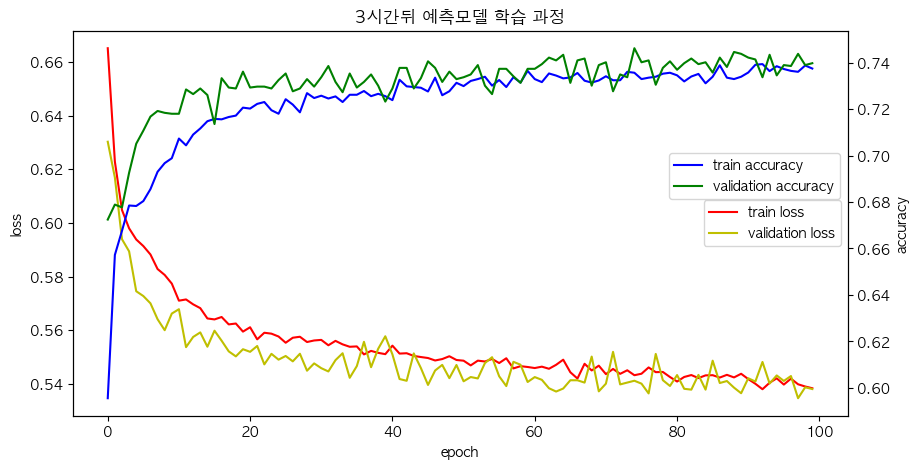

In [28]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(history_3h.history['loss'], 'r', label='train loss')
loss_ax.plot(history_3h.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(history_3h.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history_3h.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.title('3시간뒤 예측모델 학습 과정')
plt.show()

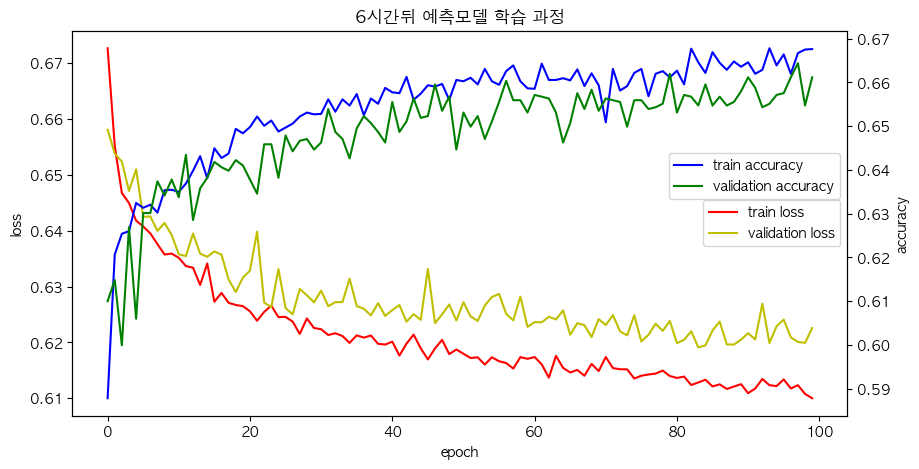

In [29]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(history_6h.history['loss'], 'r', label='train loss')
loss_ax.plot(history_6h.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(history_6h.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history_6h.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.title('6시간뒤 예측모델 학습 과정')
plt.show()

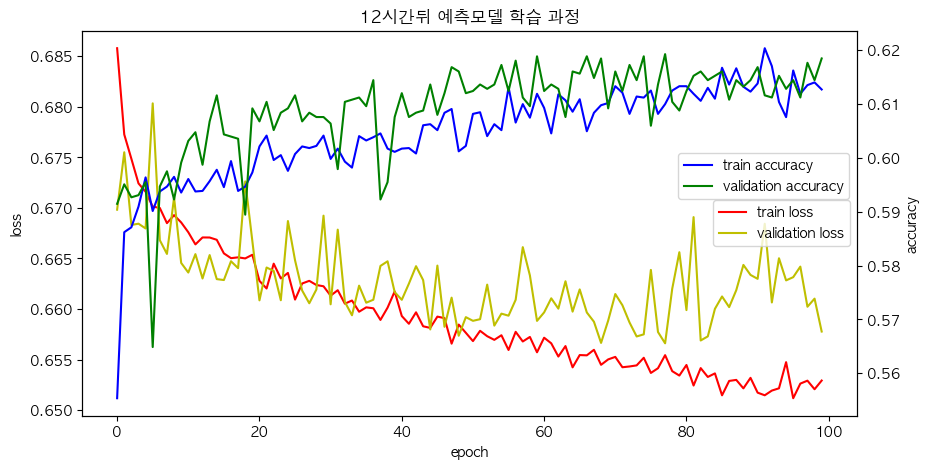

In [30]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(history_12h.history['loss'], 'r', label='train loss')
loss_ax.plot(history_12h.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(history_12h.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history_12h.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.title('12시간뒤 예측모델 학습 과정')
plt.show()

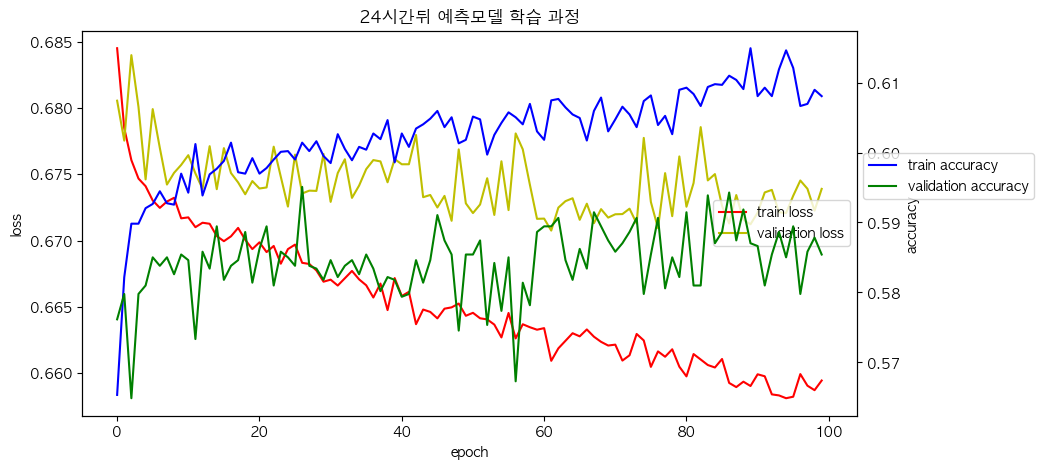

In [31]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(history_24h.history['loss'], 'r', label='train loss')
loss_ax.plot(history_24h.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(history_24h.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history_24h.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.title('24시간뒤 예측모델 학습 과정')
plt.show()

In [47]:
from tensorflow.keras.models import load_model

load_model_3h = load_model('/Volumes/ESD-ISO/project_preson/DNN/DNN_models/3h_models/3h_epoch-97-acc-0.7390-val_acc-0.7369.h5')

eval_3h = load_model_3h.evaluate(test_3h_X, test_3h_y)
print('{:.2f}% accuracy'.format(eval_3h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.5594 - accuracy: 0.7269 - recall: 0.6885 - precision: 0.7510
72.69% accuracy


In [41]:
load_model_6h = load_model('/Volumes/ESD-ISO/project_preson/DNN/DNN_models/6h_models/6h_epoch-98-acc-0.6667-val_acc-0.6644.h5')

eval_6h = load_model_6h.evaluate(test_6h_X, test_6h_y)
print('{:.2f}% accuracy'.format(eval_6h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.6183 - accuracy: 0.6618 - recall_1: 0.6840 - precision_1: 0.6605
66.18% accuracy


In [42]:
load_model_12h = load_model('/Volumes/ESD-ISO/project_preson/DNN/DNN_models/12h_models/12h_epoch-78-acc-0.6100-val_acc-0.6193.h5')

eval_12h = load_model_12h.evaluate(test_12h_X, test_12h_y)
print('{:.2f}% accuracy'.format(eval_12h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.6544 - accuracy: 0.6169 - recall_2: 0.6194 - precision_2: 0.6066
61.69% accuracy


In [43]:
load_model_24h = load_model('/Volumes/ESD-ISO/project_preson/DNN/DNN_models/24h_models/24h_epoch-22-acc-0.5840-val_acc-0.6015.h5')

eval_24h = load_model_24h.evaluate(test_24h_X, test_24h_y)
print('{:.2f}% accuracy'.format(eval_12h[1]*100))

167/167 [==============================] - 1s 5ms/step - loss: 0.6732 - accuracy: 0.5983 - recall_3: 0.4092 - precision_3: 0.6448
61.69% accuracy


In [69]:
y_hat = (load_model_3h.predict(test_3h_X) > 0.5).astype(int).reshape(-1)
c_tap_3h = pd.crosstab(y_hat, test_3h_y)
c_tap_3h.index.name = '예측값'
c_tap_3h.columns.name = '실제값'
c_tap_3h

167/167 [==============================] - 0s 2ms/step


실제값,0.0,1.0
예측값,,
0,2013,838
1,614,1852


In [70]:
f1_score_3h = f1_score(y_hat,test_3h_y)
f1_score_3h

0.7183863460046548

In [71]:
y_hat = (load_model_6h.predict(test_6h_X) > 0.5).astype(int).reshape(-1)
c_tap_6h = pd.crosstab(y_hat, test_6h_y)
c_tap_6h.index.name = '예측값'
c_tap_6h.columns.name = '실제값'
c_tap_6h

167/167 [==============================] - 0s 2ms/step


실제값,0.0,1.0
예측값,,
0,1677,851
1,947,1842


In [72]:
f1_score_6h = f1_score(y_hat,test_6h_y)
f1_score_6h

0.6720175118569867

In [73]:
y_hat = (load_model_12h.predict(test_12h_X) > 0.5).astype(int).reshape(-1)
c_tap_12h = pd.crosstab(y_hat, test_12h_y)
c_tap_12h.index.name = '예측값'
c_tap_12h.columns.name = '실제값'
c_tap_12h

167/167 [==============================] - 0s 2ms/step


실제값,0.0,1.0
예측값,,
0,1667,991
1,1046,1613


In [74]:
f1_score_12h = f1_score(y_hat,test_12h_y)
f1_score_12h

0.6129583887516625

In [75]:
y_hat = (load_model_24h.predict(test_24h_X) > 0.5).astype(int).reshape(-1)
c_tap_24h = pd.crosstab(y_hat, test_24h_y)
c_tap_24h.index.name = '예측값'
c_tap_24h.columns.name = '실제값'
c_tap_24h

167/167 [==============================] - 0s 2ms/step


실제값,0.0,1.0
예측값,,
0,2110,1546
1,590,1071


In [76]:
f1_score_24h = f1_score(y_hat,test_24h_y)
f1_score_24h

0.5007012622720898